<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/1stWeekTask/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression For Iris Dataset

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



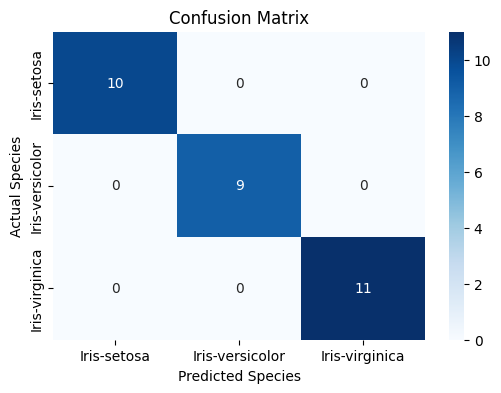

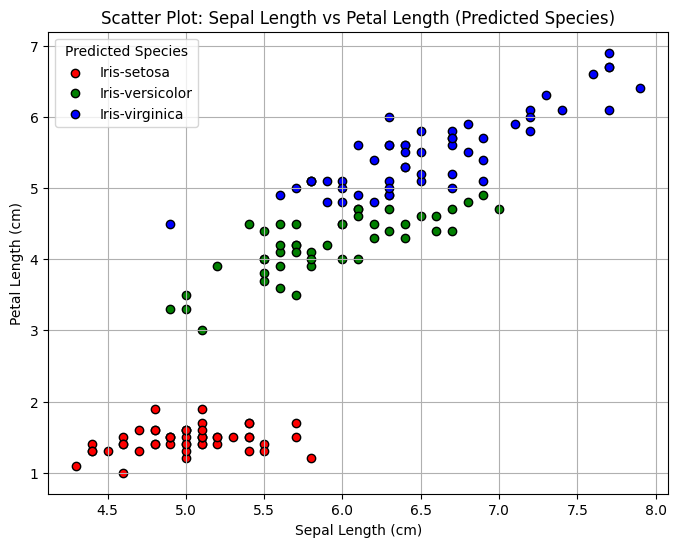

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assign path dataset
file_path = '/content/sample_data/Iris.csv'  # Copas aja path datasetnya
data = pd.read_csv(file_path)

# Hilangkan kolom Id karena tidak diperlukan
data_cleaned = data.drop(columns=['Id']) # .drop maksudnya hapus

# Encode data spesies jadi angka numerical karena dalam ML data diproses menggunakan angka
label_encoder = LabelEncoder()
data_cleaned['Species'] = label_encoder.fit_transform(data_cleaned['Species']) # fit = mencari semua kategori yang unik; transform = mengubah kategori yang didapat menjadi interger (0,1,2)

# Bagi datanya menjadi features (X) dan target (y)
X = data_cleaned.drop(columns=['Species']) # hanya berisi data tentang sepal width, petal width, sepal length, petal length
y = data_cleaned['Species'] # hanya berisi data species

# Bagi 2 menjadi training data dan test data (80(Training data) : 20(Test data))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state berguna untuk memberikan seeds, karena jika tidak menggunakan random_state setiap kali dites train dan test data akan berbeda, jika digunakan random_state maka hasil yang dikeluarkan akan sama jika dimasukkan seeds yang sama

# Melatih Model Logistic Regression
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# Membuat prediksi pada test data
y_pred = log_reg_model.predict(X_test)

# Mengecheck tingkat keakurasian model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# Visualisasi
data_cleaned['Predicted'] = log_reg_model.predict(X)

# Balikin value nya sebelum di encode saat label encode
data_cleaned['Species'] = label_encoder.inverse_transform(data_cleaned['Species'])
data_cleaned['Predicted'] = label_encoder.inverse_transform(data_cleaned['Predicted'])

# Scatter plot SepalLengthCm vs PetalLengthCm
plt.figure(figsize=(8,6))
species_unique = data_cleaned['Predicted'].unique()
colors = ['red', 'green', 'blue']

# Looping
for species, color in zip(species_unique, colors):
    subset = data_cleaned[data_cleaned['Predicted'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['PetalLengthCm'], c=color, label=species, edgecolor='black')

plt.title('Scatter Plot: Sepal Length vs Petal Length (Predicted Species)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Predicted Species')
plt.grid(True)
plt.show()
